In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [2]:
import pickle

In [3]:
with open('df_unsw_train50_no_preprocessing_labelencoder', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (889011, 47)
X teste =  (381005, 47)
y multiclasse treino =  (889011,)
y multiclasse teste =  (381005,)
y binário treino =  (889011,)
y binário teste =  (381005,)


In [5]:
X_train50_train.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src__ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
1126124,38,63740,23,62606,114,5,1.004882,1580,10168,31,...,6.0,0.0,0,15,8,10,22,6,6,6
1202977,40,20344,22,50874,114,5,0.357506,2542,23508,31,...,7.0,3.0,7,6,7,6,5,1,1,2
39741,41,3394,20,61478,114,5,28.539139,36970,1641360,31,...,0.0,0.0,0,9,6,4,4,3,1,3
156053,38,53118,26,25911,114,5,0.512517,8928,320,31,...,0.0,0.0,0,9,3,3,8,2,1,2
1230603,37,58507,27,16512,114,5,0.045381,37500,3380,31,...,0.0,0.0,0,1,1,1,4,1,1,1


In [6]:
print(y_train50_multiclass_train.unique())
print(y_train50_binary_train.unique())

['Benign' 'DoS' 'Generic' 'Fuzzers' 'Analysis' 'Exploits' 'Reconnaissance'
 'Shellcode' 'Backdoor' 'Worms']
[0 1]


In [7]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [10]:
import pickle

In [11]:
with open('df_unsw_test50_no_preprocessing_labelencoder', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [12]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1270018, 47)
y multiclasse =  (1270018,)
y binário =  (1270018,)


In [13]:
 y_test50_multiclass.value_counts()

Benign            1109380
Generic            107740
Exploits            22262
Fuzzers             12123
DoS                  8176
Reconnaissance       6993
Analysis             1338
Backdoor             1164
Shellcode             755
Worms                  87
Name: Label_multiclass, dtype: int64

In [14]:
 y_test50_binary.value_counts()

0    1109380
1     160638
Name: Label_binary, dtype: int64

In [13]:
X_test50.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src__ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,35,42325,21,39962,114,5,0.039096,2974,31328,31,...,7.0,3.0,7,8,8,6,3,1,1,10
1,35,15576,22,63617,114,5,0.009790,424,8824,31,...,7.0,3.0,7,3,3,5,6,1,1,4
2,33,14173,27,12006,114,5,0.008764,2230,14740,31,...,7.0,3.0,7,2,3,1,3,1,1,1
3,38,33848,25,62606,114,5,1.036823,1580,10168,31,...,1.0,3.0,7,1,1,3,3,1,1,2
4,42,12229,21,12108,114,5,0.872706,2934,3740,31,...,7.0,1.0,1,1,1,2,3,1,1,4


In [14]:
print(y_test50_multiclass.unique())
print(y_test50_binary.unique())

['Benign' 'DoS' 'Fuzzers' 'Generic' 'Exploits' 'Shellcode'
 'Reconnaissance' 'Analysis' 'Backdoor' 'Worms']
[0 1]


In [15]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [16]:
X_test50 = X_test50.to_numpy()
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [17]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Algoritmo RandomForest para Train e Validation - Train50

In [18]:
from sklearn.ensemble import RandomForestClassifier

### Predição train50 binária

In [19]:
rforest_train50_binary = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [20]:
rforest_train50_binary.fit(X_train50_train, y_train50_binary_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [21]:
predict_train50_binary = rforest_train50_binary.predict(X_train50_test)

In [22]:
predict_train50_binary

array([1, 0, 0, ..., 0, 0, 0])

In [23]:
y_train50_binary_test

array([1, 0, 0, ..., 0, 0, 0])

In [24]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9970787784937205

### Visualização da árvore binária

In [25]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

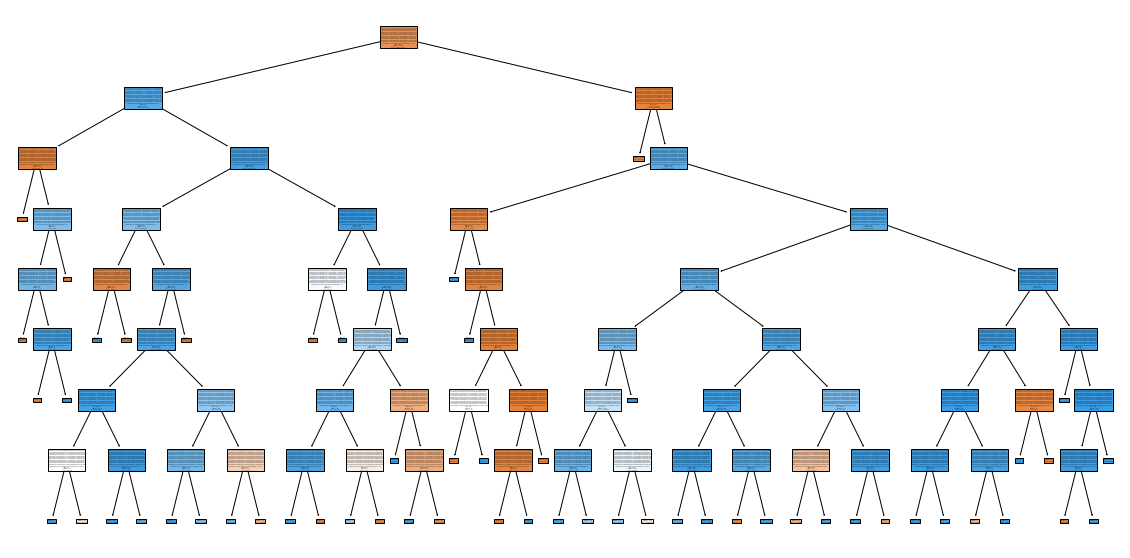

In [26]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_binary.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [27]:
#viz = dtreeviz(rforest_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

### Predição train50 multiclasse

In [28]:
rforest_train50_multiclass = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [29]:
rforest_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [30]:
predict_train50_multiclass = rforest_train50_multiclass.predict(X_train50_test)

In [31]:
predict_train50_multiclass

array(['Generic', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [32]:
y_train50_multiclass_test

array(['Generic', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [33]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9826878912350232

### Visualização da árvore multiclasse

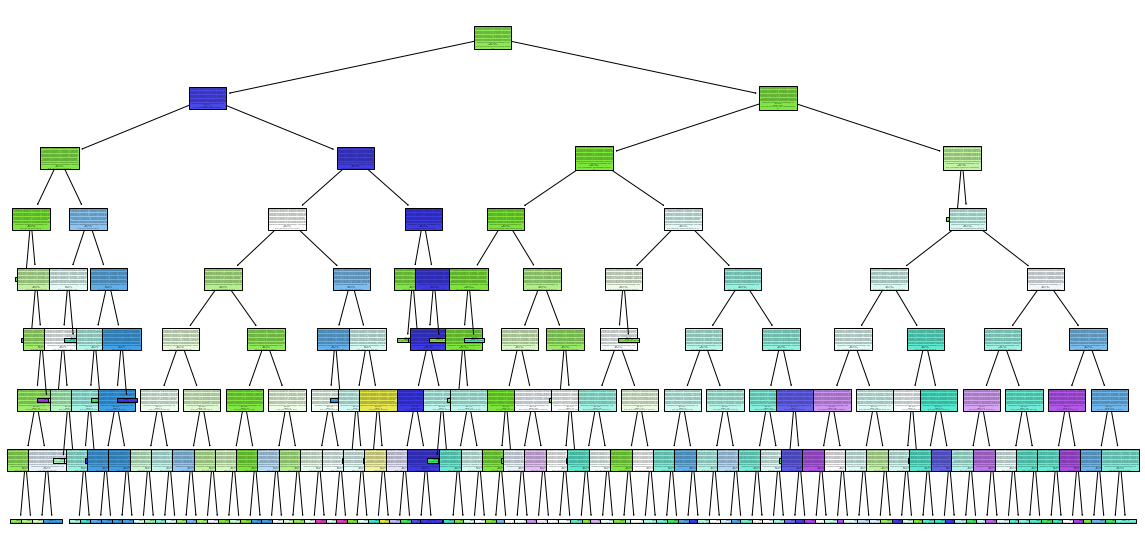

In [34]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_multiclass.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [35]:
#viz = dtreeviz(rforest_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

### Precision e Recall do train50

In [36]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999855  0.996801  0.998326    332943
           1   0.978300  0.999001  0.988542     48062

    accuracy                       0.997079    381005
   macro avg   0.989078  0.997901  0.993434    381005
weighted avg   0.997136  0.997079  0.997092    381005



In [37]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.727273  0.019512  0.038005       410
      Backdoor   1.000000  0.002924  0.005831       342
        Benign   0.998933  0.997973  0.998452    332943
           DoS   0.602649  0.072887  0.130046      2497
      Exploits   0.570566  0.940839  0.710346      6626
       Fuzzers   0.688620  0.785418  0.733841      3621
       Generic   0.999300  0.972881  0.985914     32302
Reconnaissance   0.924552  0.713018  0.805122      2028
     Shellcode   1.000000  0.000000  0.000000       211
         Worms   1.000000  0.000000  0.000000        25

      accuracy                       0.982688    381005
     macro avg   0.851189  0.450545  0.440756    381005
  weighted avg   0.985281  0.982688  0.980601    381005



### Cross Validation do train50

In [38]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(rforest_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [39]:
score_cv_train50_binary

array([0.99718791, 0.99714289, 0.99694042, 0.99697416, 0.99686168,
       0.99685043, 0.99692917, 0.99706415, 0.99679419, 0.9967267 ])

In [40]:
cv_result_train50_binary

[0.9969471691118044]

In [41]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(rforest_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [42]:
score_cv_train50_multiclass

array([0.98302625, 0.98237365, 0.98278984, 0.98327353, 0.98251988,
       0.9820362 , 0.98311605, 0.98268861, 0.98191246, 0.98209244])

In [43]:
cv_result_train50_multiclass

[0.9825828921764057]

### Matriz de Confusão do train50

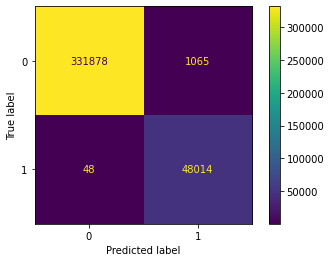

In [44]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

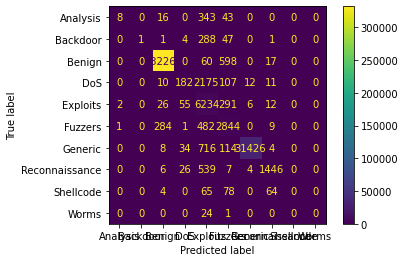

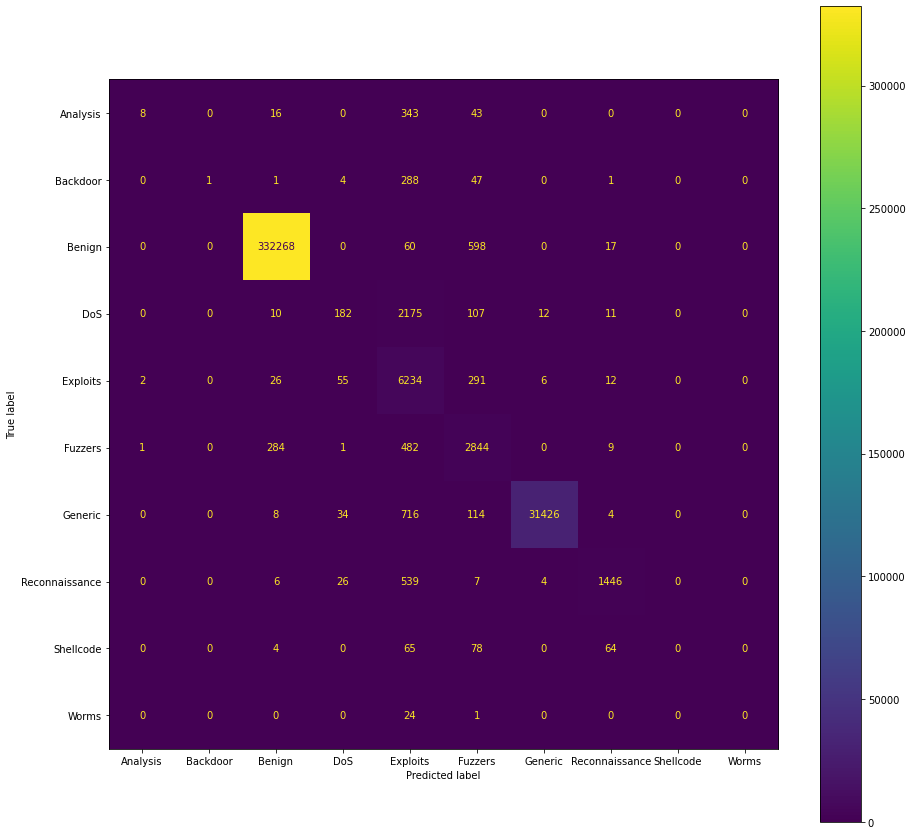

In [45]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)

# Algoritmo RandomForest para Test50

### Predição Test50 binária

In [46]:
predict_test50_binary = rforest_train50_binary.predict(X_test50)

In [47]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [48]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.8166923618405408

### Predição test50 multiclasse

In [50]:
predict_test50_multiclass = rforest_train50_multiclass.predict(X_test50)

In [51]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [52]:
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [53]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9584068887212622

### Precision e Recall do test50

In [54]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   1.000000  0.790149  0.882775   1109380
           1   0.408289  1.000000  0.579837    160638

    accuracy                       0.816692   1270018
   macro avg   0.704144  0.895075  0.731306   1270018
weighted avg   0.925158  0.816692  0.844458   1270018



In [55]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.220588  0.011211  0.021337      1338
      Backdoor   1.000000  0.008591  0.017036      1164
        Benign   0.999997  0.970182  0.984864   1109380
           DoS   0.323581  0.408513  0.361120      8176
      Exploits   0.520719  0.744542  0.612833     22262
       Fuzzers   0.265054  0.852512  0.404382     12123
       Generic   0.989270  0.983256  0.986254    107740
Reconnaissance   0.866075  0.669527  0.755222      6993
     Shellcode   1.000000  0.000000  0.000000       755
         Worms   1.000000  0.000000  0.000000        87

      accuracy                       0.958407   1270018
     macro avg   0.718528  0.464833  0.414305   1270018
  weighted avg   0.977757  0.958407  0.965085   1270018



### Matriz de Confusão do test50

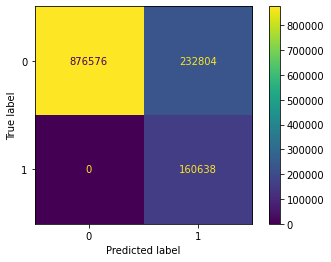

In [56]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_test50, y_test50_binary)
plt.show()

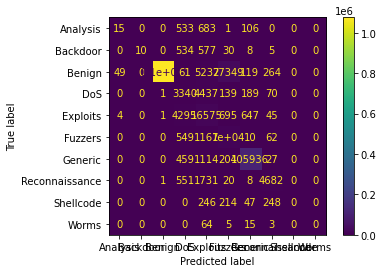

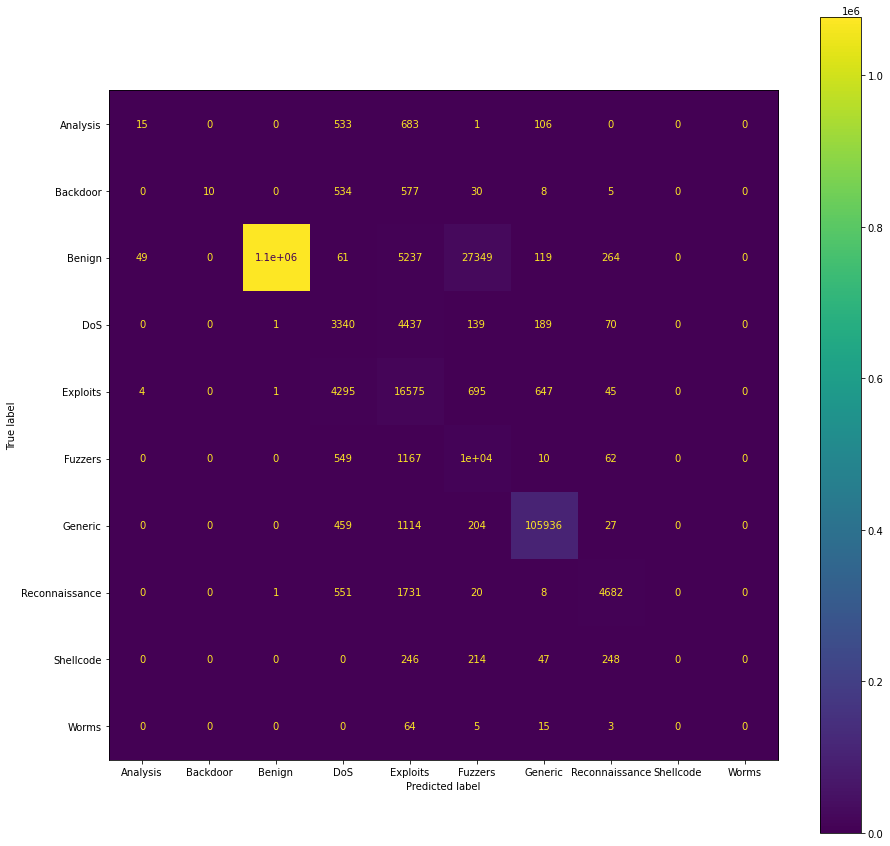

In [57]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)

In [1]:
cm.TN

NameError: name 'cm' is not defined